In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load CIFAR10 data
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [ ]:
#data preprocess and exlore
x_train, x_test = x_train/255.0 , x_test/255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train[1][0]

9

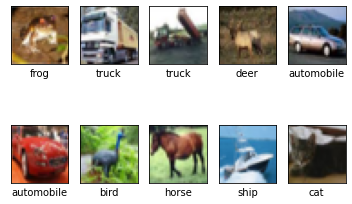

In [ ]:
# plot first 10 images from train set
class_names = ['airplane','automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [ ]:
#Build sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#now model is iniatialised with random weights. 
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.11865498,  0.28321597, -0.2678672 ,  0.00203507,  0.14891684,
        -0.5375084 , -0.52277684,  0.2451449 ,  0.54951584, -0.11782392]],
      dtype=float32)

In [ ]:
#logits to probability 
tf.nn.softmax(predictions).numpy()

array([[0.10767581, 0.12693638, 0.07315663, 0.09582323, 0.11098409,
        0.05586632, 0.05669541, 0.1221946 , 0.16566801, 0.08499955]],
      dtype=float32)

In [ ]:
#optimizer and loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
loss_fn(y_train[:1], predictions).numpy()

2.8700624

In [ ]:
model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9738 - accuracy: 0.3119
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8822 - accuracy: 0.3541
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8481 - accuracy: 0.3649
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8403 - accuracy: 0.3693
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8407 - accuracy: 0.3728
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8237 - accuracy: 0.3754
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8138 - accuracy: 0.3792
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8078 - accuracy: 0.3815
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8095 - accuracy: 0.3829
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.807

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print('\n Test accuracy : ' , test_acc)

313/313 - 1s - loss: 1.8105 - accuracy: 0.3812 - 679ms/epoch - 2ms/step

 Test accuracy :  0.38119998574256897


In [ ]:
#make prdictions
#to return proabilit, wrap trained model 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:5])
predictions[0]

1/1 [==============================] - 0s 58ms/step


array([0.01936877, 0.03430457, 0.09572586, 0.25969532, 0.01624898,
       0.1223971 , 0.23543273, 0.00118709, 0.21400213, 0.00163738],
      dtype=float32)

In [ ]:
print(np.argmax(predictions,axis =1))
print(y_test[:5])

[3 9 0 0 4]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [ ]:
#if not using softmax wrapper
np.argmax(tf.nn.softmax(model.predict(x_test[:5])).numpy(),axis =1)

1/1 [==============================] - 0s 37ms/step


array([3, 9, 0, 0, 4])

In [ ]:
model.layers

In [ ]:
#View the learned parameters
filters, biases = model.layers[1].get_weights()
f_min,f_max = filters.min(),filters.max()
filters = (filters - f_min) /(f_max - f_min)
filters.shape

(3072, 10)

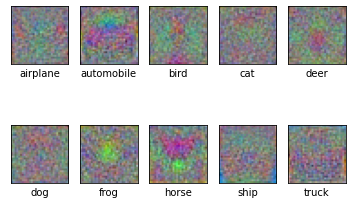

In [ ]:
#reshape to rgb
filters_rgb = filters.reshape(32,32,3,10)
#plot 10 filters
n_filters = 10
for i in range(n_filters):
  f = filters_rgb[:,:,:,i]
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[i])
  plt.imshow(f)
plt.show()  

In [ ]:
32*32*3

3072